In [1]:

import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')
import os
# update this to reflect the path to your drive
os.chdir('/content/drive/MyDrive/ST456')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import mean_squared_error

Mounted at /content/drive


In [2]:
train = pd.read_csv("train-1.csv")
test = pd.read_csv("test-1.csv")
x = train.iloc[:,:10].values
y = train.iloc[:,10].values
X=(x[:,0],x[:,1],x[:,2],x[:,3],x[:,4],x[:,5],x[:,6],x[:,7],x[:,8],x[:,9])

# P1.1

In [3]:
def generate_function(lat_dim,learningrate,activation='relu'):
  input=[]
  op=[]
  dense = tf.keras.layers.Dense(100, activation=activation)
  phi_0=tf.keras.layers.Dense(100, activation=activation,name='phi_1')
  phi_1=tf.keras.layers.Dense(lat_dim, activation=activation,name='phi_2')
  for i in range(10):
    input.append(tf.keras.layers.Input(shape=(1,)))
    op.append(phi_0(input[i]))
    op[i]=phi_1(op[i])
  dense_1=tf.keras.layers.add(op)
  phi=tf.keras.layers.Dense(100,activation=activation)(dense_1)
  final=tf.keras.layers.Dense(1,activation=activation)(phi)
  model = tf.keras.models.Model(inputs=input, outputs=final)
  model.compile(optimizer=tf.optimizers.SGD(learning_rate=learningrate),
    loss='mean_squared_error')
  return model
model=generate_function(5,0.0001)

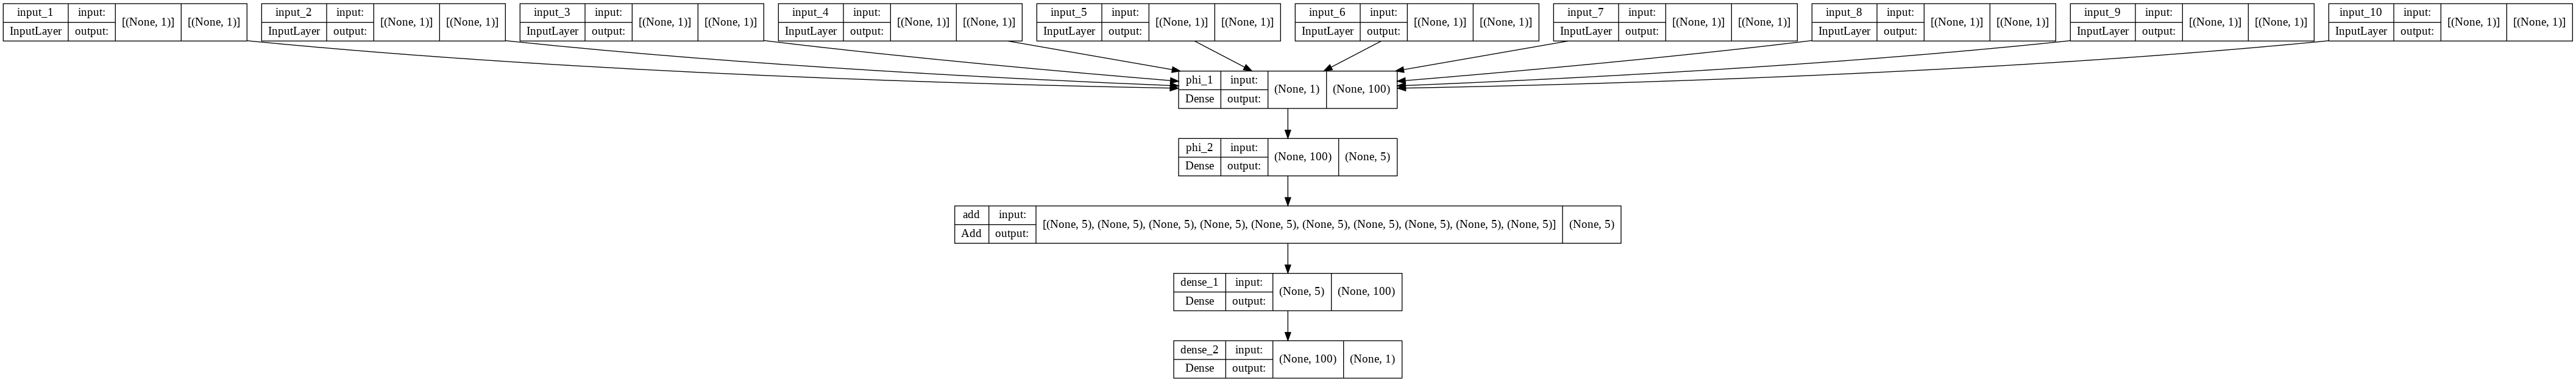

In [4]:
keras.utils.plot_model(model,'first_model.png',show_shapes=True)

So from we have (10,1) as input and then to the phi function. After complete the 100 neurons parameters. Then to the rho function, and finally with single output value.

# P1.2

In [5]:
history=model.fit(X,y,batch_size=128,verbose=0,
    validation_split = 0.1,
    validation_data = (X,y),epochs=10)


In [6]:
mse = mean_squared_error(y,model.predict(X))
print("The test mse is :",mse)

The test mse is : 0.00562282188147902


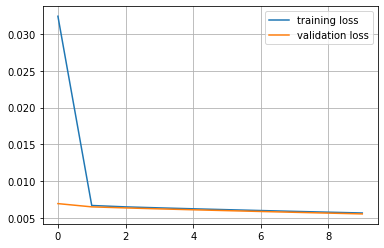

In [7]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.grid(True)
plt.show()

Now for the lat_dim=100

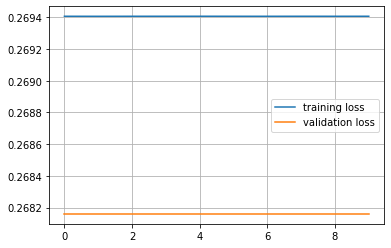

In [8]:
model_100=generate_function(100,0.0001)
history_100=model_100.fit(X,y,batch_size=128,verbose=0,
    validation_split = 0.1,
    validation_data = (X,y),epochs=10)
plt.plot(history_100.history['loss'], label='training loss')
plt.plot(history_100.history['val_loss'], label='validation loss')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
mse_100 = mean_squared_error(y,model_100.predict(X))
print("The test mse is :",mse_100)

The test mse is : 0.26928282824458516


Comparing with the lat_dim=5, lat_dim=100 has lower value of the test MSE.

# P1.3

In [10]:
model_1=generate_function(100,0.01)
model_2=generate_function(100,0.1)
model_3=generate_function(100,0.5)
history_1=model_1.fit(X,y,batch_size=128,verbose=0,
    validation_split = 0.1,
    validation_data = (X,y),epochs=10)
history_2=model_2.fit(X,y,batch_size=128,verbose=0,
    validation_split = 0.1,
    validation_data = (X,y),epochs=10)
history_3=model_3.fit(X,y,batch_size=128,verbose=0,
    validation_split = 0.1,
    validation_data = (X,y),epochs=10)

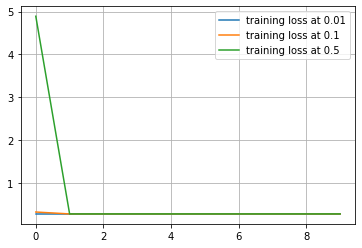

In [11]:
plt.plot(history_1.history['loss'], label='training loss at 0.01')
plt.plot(history_2.history['loss'], label='training loss at 0.1')
plt.plot(history_3.history['loss'], label='training loss at 0.5')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
mse1 = mean_squared_error(y,model_1.predict(X))
mse2 = mean_squared_error(y,model_2.predict(X))
mse3 = mean_squared_error(y,model_3.predict(X))
print("The test mse is :",mse1)
print("The test mse is :",mse2)
print("The test mse is :",mse3)

The test mse is : 0.26928282824458516
The test mse is : 0.26928282824458516
The test mse is : 0.26928282824458516


# P1.4

In [13]:
history_4=model_100.fit(X,y,batch_size=128,verbose=0,
    validation_split = 0.1,
    validation_data = (X,y),epochs=50)
model_5=generate_function(100,0.0001,activation='sigmoid')
history_5=model_5.fit(X,y,batch_size=128,verbose=0,
    validation_split = 0.1,
    validation_data = (X,y),epochs=50)

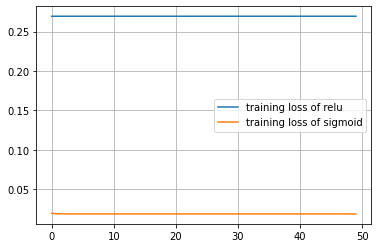

In [14]:
plt.plot(history_4.history['loss'], label='training loss of relu')
plt.plot(history_5.history['loss'], label='training loss of sigmoid')

plt.legend()
plt.grid(True)
plt.show()

In [15]:
mse5 = mean_squared_error(y,model_5.predict(X))
print("The test mse is :",mse_100)
print("The test mse is :",mse5)

The test mse is : 0.26928282824458516
The test mse is : 0.018941776702185418


# p1.5

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:

lat_dim = list(range(1,10)) + list(range(0,110,10))
lat_dim.remove(0)

Lat_dim:1  Mse:0.26928282824458516
Lat_dim:2  Mse:0.011886767163200937
Lat_dim:3  Mse:0.26928282824458516
Lat_dim:4  Mse:0.004371898970173267
Lat_dim:5  Mse:0.006315723479223102
Lat_dim:6  Mse:0.26928282824458516
Lat_dim:7  Mse:0.26928282824458516
Lat_dim:8  Mse:0.26928282824458516
Lat_dim:9  Mse:0.26928282824458516
Lat_dim:10  Mse:0.26928282824458516
Lat_dim:20  Mse:0.26928282824458516
Lat_dim:30  Mse:0.0069263867714380485
Lat_dim:40  Mse:0.004623856926119663
Lat_dim:50  Mse:0.26928282824458516
Lat_dim:60  Mse:0.26928282824458516
Lat_dim:70  Mse:0.0041111428051858615
Lat_dim:80  Mse:0.005101286323929981
Lat_dim:90  Mse:0.006311826566343714
Lat_dim:100  Mse:0.26928282824458516


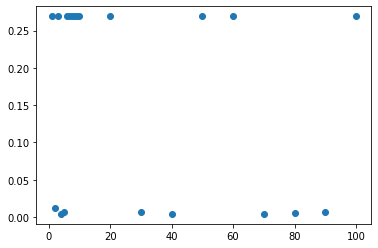

In [18]:
Dim=[]
Mse=[]
for dim in lat_dim:
    model = generate_function(dim,0.0001)
    model.fit(X,y,batch_size=128,verbose=0,
    validation_split = 0.1,
    validation_data = (X,y),epochs=5)
    mse = mean_squared_error(y,model.predict(X))
    Dim.append(dim)
    Mse.append(mse)
    print("Lat_dim:{}  Mse:{}".format(dim,mse))
plt.scatter(Dim,Mse)   

# P2.1

In [ ]:
xtrain_2 = pd.read_csv("xtrain-2.csv").drop(columns=["Unnamed: 0"])
ytrain_2 = pd.read_csv("ytrain-2.csv").drop(columns=["Unnamed: 0"])

xtest_2 = pd.read_csv("xtest-2.csv").drop(columns=["Unnamed: 0"])
ytest_2 = pd.read_csv("ytest-2.csv").drop(columns=["Unnamed: 0"])
X_train, X_valid, y_train, y_valid = train_test_split(xtrain_2,ytrain_2,test_size=0.1)
input_dim = X_train.shape[1]
output_dim = ytrain_2.shape[1]

In [ ]:
input =tf.keras.layers.Input(shape=(input_dim,))
dense = tf.keras.layers.Dense(input_dim, activation="relu")(input)
output=tf.keras.layers.Dense(input_dim,activation="relu")(dense)
output=tf.keras.layers.Dense(input_dim,activation="relu")(output)
output=tf.keras.layers.Dense(output_dim)(output)
model = tf.keras.models.Model(inputs=input, outputs=output)

In [ ]:
optimizer = optimizers.Adam(learning_rate=1e-4,epsilon=1e-3)
model.compile(optimizer=optimizer, loss='mse')
history = model.fit(X_train, y_train, batch_size=300, epochs=100, validation_data=(X_valid, y_valid))